In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import os

Probability density function
---
The derivative of a CDF is called a probability density function, or PDF.

The result
is not a probability; it is a probability density


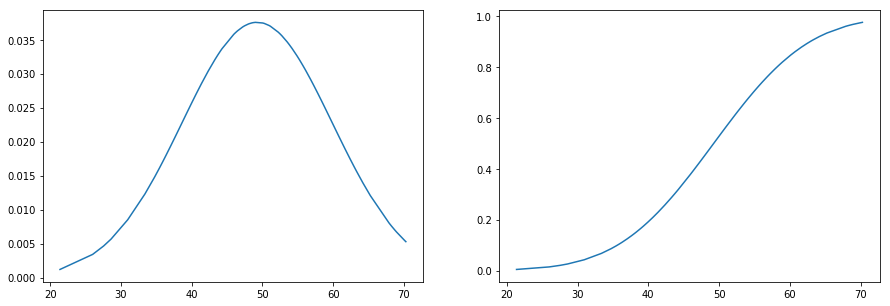

In [3]:
# 1. create a random normal distribution

normal_sample = sorted(np.random.normal(loc=50,scale=10,size=100))
pdf = stats.norm.pdf(normal_sample,loc=np.mean(normal_sample),scale=np.std(normal_sample))
cdf = stats.norm.cdf(normal_sample,loc=np.mean(normal_sample),scale=np.std(normal_sample))

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(15,5)
ax1.plot(normal_sample,pdf)
ax2.plot(normal_sample,cdf)

In [4]:
# plot the heights of the people
df = pd.read_csv(os.path.join('..','data','brfss.csv'))
df = df.dropna()
df.head()

,Unnamed: 0,age,sex,wtyrago,finalwt,wtkg2,htm3
0,0,82.0,2,76.363636,185.870345,70.91,157.0
1,1,65.0,2,72.727273,126.603027,72.73,163.0
3,3,61.0,1,73.636364,517.926275,73.64,170.0
4,4,26.0,1,88.636364,1252.624630,88.64,185.0
5,5,42.0,1,118.181818,415.161314,109.09,183.0


In [17]:
# plotting the normal distribution of the given data: heights
heights = df[df['sex']==2]['htm3']
mean = np.mean(heights)
std = np.std(heights)

In [18]:
def eval_cdf(value,series):
    count =0
    for x in series:
        if x <= value:
            count += 1
    return count/len(series)

def compute_cdf(series):
    x = sorted(series)
    y = []
    for value in x:
        y.append(eval_cdf(value,x))
    return x,y

def calc_pmf(series):
    freq = series.value_counts().sort_index()
    freq_sum = sum(freq)
    pmf = freq/freq_sum
    return pmf.index,pmf.values

Text(0.5,0,'Heights in cm')

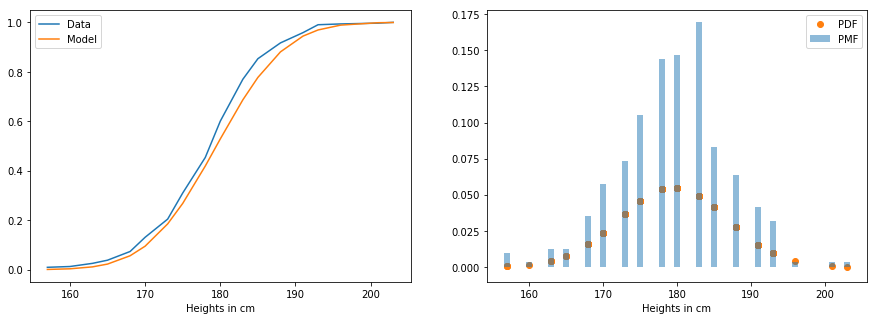

In [25]:
# compare the pdf and cdf with the model

# cdf
x,y = compute_cdf(heights.values)
model_cdf = stats.norm.cdf(x,loc=mean,scale=std)
# pdf vs pmf
x1,pmf = calc_pmf(heights)
normal_model = stats.norm.pdf(heights,loc=mean,scale=std)
#plotting
# cdf
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(15,5)
ax1.plot(x,y,label='Data')
ax1.plot(x,model_cdf,label='Model')
ax1.set_xlabel('Heights in cm')
ax1.legend()
# pdf vs pmf
ax2.bar(x1,pmf,alpha=0.5,label='PMF')
ax2.scatter(heights.values,normal_model,label='PDF')
ax2.legend()
ax2.set_xlabel('Heights in cm')

**Qoura answer**

PMF is Probability Mass Function. The probability is clumped up as point masses. In other words, a significant portion of the probability will be at individual points.

PDF is Probability Density Function. The probability is spread over an area. The probability of a specific X value is 0, because there is not a large clump of probability at a single point.

**Math stackexchange**

One is for discrete variables, the other for continuous. They are also interpreted differently. The pdf is a probability "density". If f(x) is the pdf, f(x) doesn't tell you the probability of getting x (In fact, the probability of getting precisely x is 0). The way you use pdf's is through integration. So, the probability of getting a value that is in a dx area around x is approximately f(x)*dx

**this book**

A PDF is the derivative of a continuous CDF; or, equivalently, a CDF is the
integral of a PDF. Remember that a PDF maps from values to probability
densities; to get a probability, you have to integrate

kernel density estimation
----

Kernel density estimation (KDE) is an algorithm that takes a sample
and finds an appropriately smooth PDF that fits the data

Text(0,0.5,'Probalility')

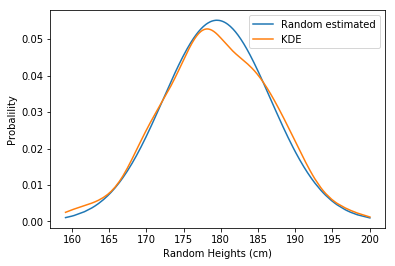

In [33]:
# first plot the random samples
random_heights = sorted(np.random.normal(loc=mean,scale=std,size=500))
# find the estimated pdf
estimated = stats.norm.pdf(random_heights,loc=mean,scale=std)

# find the appropriate smooth PDF that fits the data from sample
kde = stats.gaussian_kde(random_heights)
kde_pdf = kde.evaluate(random_heights)

# plot and compare both
plt.plot(random_heights,estimated,label='Random estimated')
plt.plot(random_heights,kde_pdf,label='KDE')
plt.legend()
plt.xlabel('Random Heights (cm)')
plt.ylabel('Probalility')


Density takes a value or sequence, calls gaussian_kde.evaluate, and returns the resulting density. The word \Gaussian" appears in the name because it uses a filter based on a Gaussian distribution to smooth the KDE

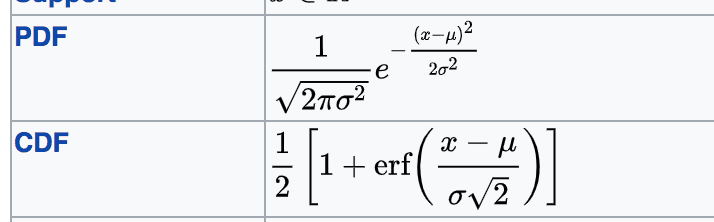

scipy uses this formula to find out the estimated pdf

**Estimating a density function with KDE is useful for several purposes:**
    
• Visualization: During the exploration phase of a project, **CDFs are
usually the best visualization of a distribution**. After you look at a
CDF, you can decide **whether an estimated PDF is an appropriate
model of the distribution**. *If so, it can be a better choice for presenting
the distribution to an audience that is unfamiliar with CDFs*.

• Interpolation: **An estimated PDF is a way to get from a sample to
a model of the population**. If you have reason to believe that the
population distribution is smooth, **you can use KDE to interpolate the
density for values that don’t appear in the sample**.

• Simulation: Simulations are often based on the distribution of a sample.
If the sample size is small, **it might be appropriate to smooth the sample
distribution using KDE, which allows the simulation to explore more
possible outcomes, rather than replicating the observed data**.

The distribution framework
---

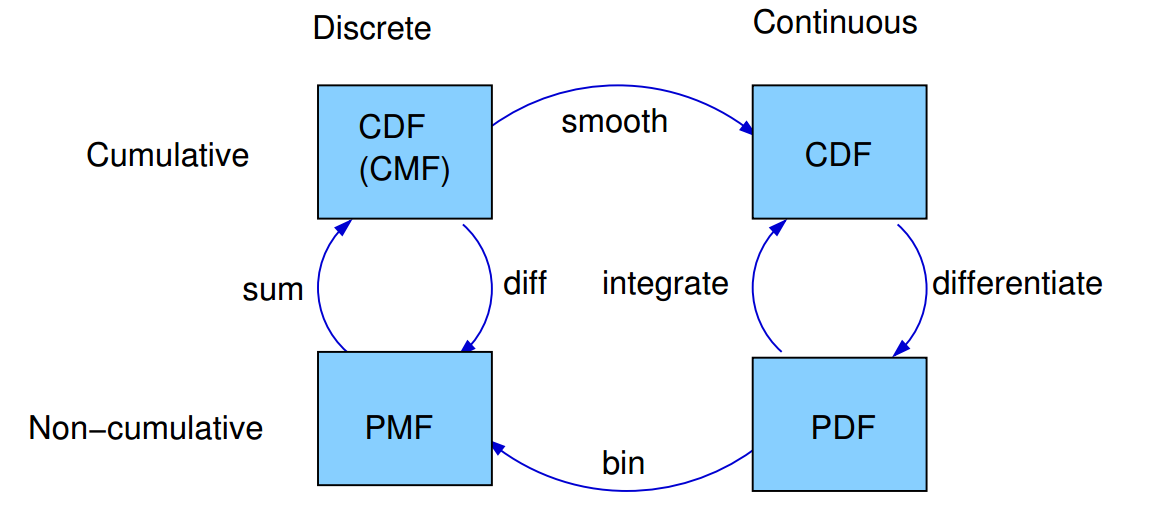

1. To get from a PMF to a CDF, you add up the probability masses to
get cumulative probabilities. To get from a CDF back to a PMF, you compute
differences in cumulative probabilities

2. To get from a discrete to a continuous distribution, you can perform various
kinds of smoothing. One form of smoothing is to assume that the data come from an analytic continuous distribution (like exponential or normal) and
to estimate the parameters of that distribution. Another option is kernel
density estimation.

3. The opposite of smoothing is discretizing, or quantizing. If you evaluate a
PDF at discrete points, you can generate a PMF that is an approximation of
the PDF. You can get a better approximation using numerical integration

**6.4 Hist implementation**

In [163]:
# returning the frequency based on the series and bins
def return_hist(series,bins):
    divisions = np.linspace(start=min(series),stop=max(series),num=bins+1)
    d = {}
    for count in range(0,bins+1):
        values = [x for x in series if x<divisions[count] and x>=divisions[count-1]]
        d.setdefault(divisions[count],len(values))
    return d

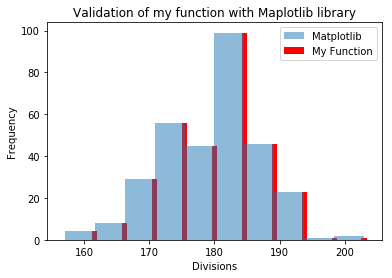

In [169]:
d = return_hist(heights,bins=10)
plt.bar(d.keys(),d.values(),label='My Function',color='red')
plt.hist(heights,bins=10,alpha=0.5,label='Matplotlib')
plt.title('Validation of my function with Maplotlib library')
plt.xlabel('Divisions')
plt.ylabel('Frequency')
plt.legend()

6.5 PMF and 6.6 CDF implementation already done in the earlier chapters

6.7 Moments
---
When k = 1 the result is the sample mean, ¯ x. The other raw moments don’t
mean much by themselves, but they are used in some computations

When k = 2 the result is the second central moment, which you might
recognize as variance

If we attach a weight along a ruler at
each location, xi, and then spin the ruler around the mean, the moment of inertia of the spinning weights is the variance of the values. If you are
not familiar with moment of inertia

6.8 Skewness
---

Skewness is a property that describes the shape of a distribution. If the
distribution is symmetric around its central tendency, it is unskewed. If the
values extend farther to the right, it is right skewed" and if the values extend
left, it is left skewed."

 Skewness only describes the shape of the distribution; it says nothing about
whether the sampling process might have been biased.

In [172]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    return CentralMoment(xs, k) / std**k
def Skewness(xs):
    return StandardizedMoment(xs, 3)

skewness function is the third standardized moment, which means that it has been normalized so it has no units.

The magnitude of skewness indicates the
strength of the skewness, but by itself it is not easy to interpret.

In practice, computing sample skewness is usually not a good idea. If there
are any outliers, they have a disproportionate effect on the skewness function

**Pearson’s median skewness** coefficient is a measure of skewness based
on the difference between the sample mean and median

This statistic is robust, which means that it is less vulnerable to the effect
of outliers.

In [177]:
# lets look at some examples
df_nsfg = pd.read_csv(os.path.join('..','data','2002FemPreg.csv'),low_memory=False)

In [237]:
totalwgts=df_nsfg['totalwgt_lb'].dropna()
totalwgts = sorted(totalwgts.values)

In [238]:
# find the estimated pdf using kernel density function
kde = stats.gaussian_kde(totalwgts).evaluate(totalwgts)

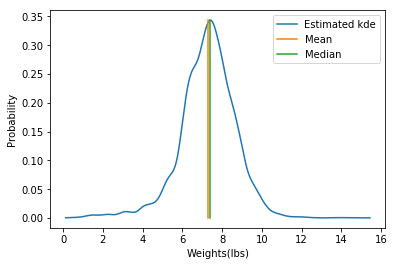

In [239]:
def plot_kde(series,xlabel):
    plt.plot(series,kde,label='Estimated kde')
    mean= np.mean(series)
    median = np.median(series)
    plt.plot([mean,mean],[min(kde),max(kde)],label='Mean',)
    plt.plot([median,median],[min(kde),max(kde)],label='Median')
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel('Probability')

plot_kde(totalwgts,'Weights(lbs)')

In [242]:
# find the skewness
def pearson_skew(values):
    return 3*(np.mean(values) - np.median(values))/np.std(values)

def standardized_moment(values,k):
    mean = np.mean(values)
    moment = sum([(x-mean)**k for x in values])/len(values)
    return moment/(np.std(values))**k
def compute_skewness(series):
# standardized moment is the third standardized moment, which means that it has been normalized so it has no units.
    mean = np.mean(series)
    median = np.mean(series)
    print('pearson skewness = %.2f | sample skewness = %.2f' % (pearson_skew(series),standardized_moment(series,3)))
    print('mean = %.2f | median = %.2f' % (mean,median))
compute_skewness(totalwgts)

pearson skewness = -0.23 | sample skewness = -0.59
mean = 7.27 | median = 7.27


In [243]:
# data: brfss
wgts = sorted(df['wtkg2'].values)
# find the estimated pdf using kernel density function
kde = stats.gaussian_kde(wgts).evaluate(wgts)

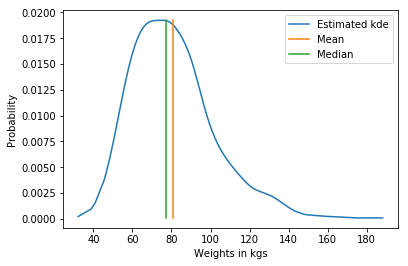

In [244]:
plot_kde(wgts,'Weights in kgs')

In [245]:
compute_skewness(wgts)

pearson skewness = 0.51 | sample skewness = 0.94
mean = 80.83 | median = 80.83


In [246]:
np.mean(wgts)

80.83396739130434

Sample skewness
is less robust; that is, it is more susceptible to outliers. As a result it is less
reliable when applied to skewed distributions, exactly when it would be most
relevant.

Pearson’s median skewness is based on a computed mean and variance, so
it is also susceptible to outliers, but since it does not depend on a third
moment, it is somewhat more robust